## Import data and Preprocess it

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("diabetes.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
X = df.iloc[:,:-1]
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [4]:
y = df.iloc[:,-1]
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
X.shape

(614, 8)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [8]:
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

# Hyperparameter tuning

In [9]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

In [10]:
import keras_tuner as kt

## build_model method

    Similar to defining model architecture and compiling model

In [11]:
def build_model(hp):

    model = Sequential()

    ## Hideen layer, with variable units
    units = hp.Choice('units', values=[8, 16, 32, 64, 128])
    model.add(Dense(units=units, activation='relu', input_dim=8))

    ## Output layer
    model.add(Dense(units=1, activation='sigmoid'))

    ## Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

## Create tuner object

In [12]:
tuner = kt.RandomSearch(build_model, objective='val_accuracy', max_trials=5)

Reloading Tuner from .\untitled_project\tuner0.json


## Search best hyperparameters

    Similar to model.fit

In [13]:
tuner.search(X, y, epochs=5, validation_data=(X_test, y_test))

Trial 5 Complete [00h 00m 01s]
val_accuracy: 0.8181818127632141

Best val_accuracy So Far: 0.8181818127632141
Total elapsed time: 00h 15m 47s


## Fetch best params and best model

In [17]:
tuner.get_best_hyperparameters()[0].values

{'units': 128}

In [21]:
model = tuner.get_best_models(num_models=1)[0]
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,281 (5.00 KB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 0 (0.00 B)

## Train the best model

In [22]:
history = model.fit(X, y, validation_data=(X_test, y_test), epochs=100, initial_epoch=5)
history = history.history

Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7348 - loss: 0.5063 - val_accuracy: 0.8182 - val_loss: 0.4286
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7668 - loss: 0.4907 - val_accuracy: 0.8182 - val_loss: 0.4180
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7509 - loss: 0.4903 - val_accuracy: 0.8247 - val_loss: 0.4115
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7768 - loss: 0.4442 - val_accuracy: 0.8247 - val_loss: 0.4107
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8105 - loss: 0.4228 - val_accuracy: 0.8182 - val_loss: 0.4094
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7461 - loss: 0.4772 - val_accuracy: 0.8312 - val_loss: 0.4100
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7922 - loss: 0.4475 - val_accuracy: 0.8312 - val_loss: 0.4107
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7610 - loss: 0.4715 - val_accuracy: 0.8247

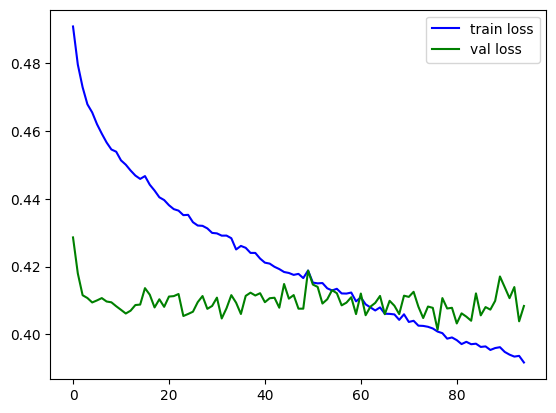

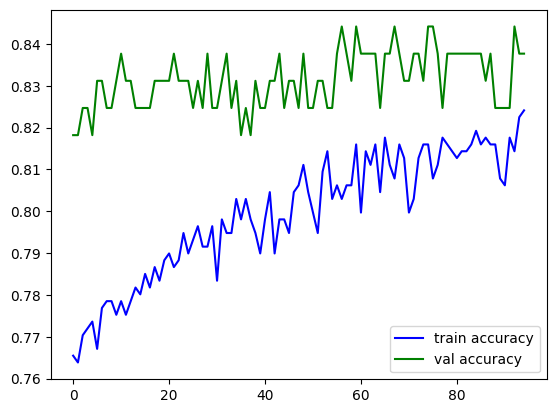

In [23]:
plt.plot(history['loss'], label='train loss', color='blue')
plt.plot(history['val_loss'], label='val loss', color='green')
plt.legend()
plt.show()

plt.plot(history['accuracy'], label='train accuracy', color='blue')
plt.plot(history['val_accuracy'], label='val accuracy', color='green')
plt.legend()
plt.show()

In [27]:
history['val_accuracy'][-1]

0.8376623392105103